<h1>국내 여행 로그 데이터(서부권) (2023)</h1>

<hr>
<h2>[패키지 및 데이터 로드]</h2>

In [1]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 숫자 표기 설정
pd.options.display.float_format = '{:,.2f}'.format # 지수 없이 숫자로
#pd.reset_option('display.float_format') # 지수표기법

# 출력 설정 변경 (None : 모든 행,열 출력)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
#pd.reset_option('all') # 설정 변경 초기화 

In [2]:
# 분석용 데이터 불러오기
raw_traveller_master = pd.read_csv('data/training/original_data/여행객.csv', encoding='UTF-8')
raw_companion_info = pd.read_csv('data/training/original_data/동반자정보.csv', encoding='UTF-8')
raw_travel = pd.read_csv('data/training/original_data/여행.csv', encoding='UTF-8')
raw_mvmn_consume = pd.read_csv('data/training/original_data/이동수단소비내역.csv', encoding='UTF-8')
raw_lodge_consume = pd.read_csv('data/training/original_data/숙박소비내역.csv', encoding='UTF-8')
raw_activity = pd.read_csv('data/training/original_data/활동내역.csv', encoding='UTF-8')
raw_activity_consume = pd.read_csv('data/training/original_data/활동소비내역.csv', encoding='UTF-8')
raw_adv_consume = pd.read_csv('data/training/original_data/사전소비내역.csv', encoding='UTF-8')

# 복사본 만들기 
traveller_master = raw_traveller_master.copy()
companion_info = raw_companion_info.copy()
travel = raw_travel.copy()
mvmn_consume = raw_mvmn_consume.copy()
lodge_consume = raw_lodge_consume.copy()
activity = raw_activity.copy()
activity_consume = raw_activity_consume.copy()
adv_consume = raw_adv_consume.copy()

<hr>
<h2>[여행객.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [3]:
# 필요한 변수 리스트
columns_to_keep_traveller = [
    'TRAVELER_ID', 'GENDER', 'AGE_GRP', 'JOB_NM', 'TRAVEL_TERM', 'TRAVEL_LIKE_SGG_1', 'TRAVEL_LIKE_SGG_2', 'TRAVEL_LIKE_SGG_3', 
    'TRAVEL_STYL_1','TRAVEL_STYL_2','TRAVEL_STYL_3','TRAVEL_STYL_4','TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
    'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_DESTINATION', 'TRAVEL_STATUS_ACCOMPANY', 'TRAVEL_MOTIVE_1', 'TRAVEL_COMPANIONS_NUM'
    ]

# traveller_master에 필요한 변수만 남기고 저장
traveller_master = traveller_master[columns_to_keep_traveller]

# 변수명 변경
traveller_master = traveller_master.rename(columns={'TRAVEL_MOTIVE_1' : 'TRAVEL_MOTIVE'})

# 결과 확인
print(traveller_master.head())

  TRAVELER_ID GENDER  AGE_GRP  JOB_NM  TRAVEL_TERM  TRAVEL_LIKE_SGG_1  TRAVEL_LIKE_SGG_2  TRAVEL_LIKE_SGG_3  TRAVEL_STYL_1  TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  TRAVEL_STYL_7  TRAVEL_STYL_8 TRAVEL_STATUS_RESIDENCE TRAVEL_STATUS_DESTINATION TRAVEL_STATUS_ACCOMPANY  TRAVEL_MOTIVE  TRAVEL_COMPANIONS_NUM
0     g002178      여       20      12            3              50130              50110              26500              1              1              1              3              3              2              6              6                   광주광역시                        전남             2인 여행(가족 외)              1                      1
1     g004485      남       40       2            2              48840              48220              26500              1              1              3              6              4              2              7              7                   대전광역시                        전북             2인 여행(가족 외)              1    

In [4]:
# 데이터의 행, 열 개수 출력
print('여행객.csv의 행, 열 개수 : ')
print(traveller_master.shape)

여행객.csv의 행, 열 개수 : 
(2560, 21)


In [5]:
# 데이터의 구조와 타입 확인
print('여행객.csv의 구조와 타입 : ')
print(traveller_master.info())

여행객.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TRAVELER_ID                2560 non-null   object
 1   GENDER                     2560 non-null   object
 2   AGE_GRP                    2560 non-null   int64 
 3   JOB_NM                     2560 non-null   int64 
 4   TRAVEL_TERM                2560 non-null   int64 
 5   TRAVEL_LIKE_SGG_1          2560 non-null   int64 
 6   TRAVEL_LIKE_SGG_2          2560 non-null   int64 
 7   TRAVEL_LIKE_SGG_3          2560 non-null   int64 
 8   TRAVEL_STYL_1              2560 non-null   int64 
 9   TRAVEL_STYL_2              2560 non-null   int64 
 10  TRAVEL_STYL_3              2560 non-null   int64 
 11  TRAVEL_STYL_4              2560 non-null   int64 
 12  TRAVEL_STYL_5              2560 non-null   int64 
 13  TRAVEL_STYL_6              2560 non-null   i

In [6]:
# 데이터의 결측치 확인
print('여행객.csv의 결측치 : ')
print(traveller_master.isnull().sum())

여행객.csv의 결측치 : 
TRAVELER_ID                  0
GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
dtype: int64


In [7]:
# 데이터 살펴보기
traveller_master.head()

,TRAVELER_ID,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM
0,g002178,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1
1,g004485,남,40,2,2,48840,48220,26500,1,1,3,6,4,2,7,7,대전광역시,전북,2인 여행(가족 외),1,1
2,g005167,남,20,1,3,46710,45190,47170,2,3,1,4,6,3,1,7,서울특별시,전남,2인 여행(가족 외),7,1
3,g002887,여,30,3,2,42150,42210,28710,2,2,3,2,3,5,2,6,인천광역시,대전,2인 여행(가족 외),2,1
4,g004189,남,20,4,2,42150,50110,26350,2,1,2,4,6,5,6,5,경기도,충남,2인 여행(가족 외),2,1


<h3>2. 전처리</h3>

<h5>1) 모든 CSV 파일 통합을 위해 TRAVELER_ID를 TRAVEL_ID 형식으로 변환</h5>

In [8]:
# TRAVELER_ID의 가장 앞의 알파벳과 _를 추출하여 TRAVELER_ID에 결합하기 위한 함수
def modify_travel_id(travel_id):
    match = re.match(r'([a-zA-Z])(\d+)', travel_id)
    if match:
        return f'{match.group(1)}_{match.group(0)}'
    return travel_id

# TRAVELER_ID 변환
traveller_master['TRAVEL_ID'] = traveller_master['TRAVELER_ID'].apply(modify_travel_id)

# 변환 결과 확인
traveller_master[['TRAVELER_ID', 'TRAVEL_ID']].head()

,TRAVELER_ID,TRAVEL_ID
0,g002178,g_g002178
1,g004485,g_g004485
2,g005167,g_g005167
3,g002887,g_g002887
4,g004189,g_g004189


In [9]:
# TRAVELER_ID 컬럼 삭제
traveller_master.drop(columns=['TRAVELER_ID'], inplace=True)

# 결과 확인
traveller_master.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID
0,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178
1,남,40,2,2,48840,48220,26500,1,1,3,6,4,2,7,7,대전광역시,전북,2인 여행(가족 외),1,1,g_g004485
2,남,20,1,3,46710,45190,47170,2,3,1,4,6,3,1,7,서울특별시,전남,2인 여행(가족 외),7,1,g_g005167
3,여,30,3,2,42150,42210,28710,2,2,3,2,3,5,2,6,인천광역시,대전,2인 여행(가족 외),2,1,g_g002887
4,남,20,4,2,42150,50110,26350,2,1,2,4,6,5,6,5,경기도,충남,2인 여행(가족 외),2,1,g_g004189


<h3>3. 전처리 후 확인</h3>

In [10]:
# TRAVEL_ID 중복 여부 확인
duplicates = traveller_master[traveller_master.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
    print(duplicates)
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [11]:
# 데이터의 구조와 타입 확인
print('여행객.csv의 구조와 타입 : ')
print(traveller_master.info())

여행객.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   GENDER                     2560 non-null   object
 1   AGE_GRP                    2560 non-null   int64 
 2   JOB_NM                     2560 non-null   int64 
 3   TRAVEL_TERM                2560 non-null   int64 
 4   TRAVEL_LIKE_SGG_1          2560 non-null   int64 
 5   TRAVEL_LIKE_SGG_2          2560 non-null   int64 
 6   TRAVEL_LIKE_SGG_3          2560 non-null   int64 
 7   TRAVEL_STYL_1              2560 non-null   int64 
 8   TRAVEL_STYL_2              2560 non-null   int64 
 9   TRAVEL_STYL_3              2560 non-null   int64 
 10  TRAVEL_STYL_4              2560 non-null   int64 
 11  TRAVEL_STYL_5              2560 non-null   int64 
 12  TRAVEL_STYL_6              2560 non-null   int64 
 13  TRAVEL_STYL_7              2560 non-null   i

In [12]:
# 데이터의 결측치 확인
print('여행객.csv의 결측치 : ')
print(traveller_master.isnull().sum())

여행객.csv의 결측치 : 
GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
TRAVEL_ID                    0
dtype: int64


In [13]:
# 데이터 살펴보기
traveller_master.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID
0,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178
1,남,40,2,2,48840,48220,26500,1,1,3,6,4,2,7,7,대전광역시,전북,2인 여행(가족 외),1,1,g_g004485
2,남,20,1,3,46710,45190,47170,2,3,1,4,6,3,1,7,서울특별시,전남,2인 여행(가족 외),7,1,g_g005167
3,여,30,3,2,42150,42210,28710,2,2,3,2,3,5,2,6,인천광역시,대전,2인 여행(가족 외),2,1,g_g002887
4,남,20,4,2,42150,50110,26350,2,1,2,4,6,5,6,5,경기도,충남,2인 여행(가족 외),2,1,g_g004189


<hr>
<h2>[동반자정보.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [14]:
# 필요한 변수 리스트
columns_to_keep_companion = [
    'TRAVEL_ID', 'REL_CD', 'COMPANION_GENDER', 'COMPANION_AGE_GRP'
    ]

# companion_info에 필요한 변수만 남기고 저장
companion_info_grouped = companion_info[columns_to_keep_companion]

# 결과 확인
print(companion_info_grouped.head())

   TRAVEL_ID  REL_CD  COMPANION_GENDER  COMPANION_AGE_GRP
0  e_e000005       1                 1                  4
1  e_e000191       1                 2                  5
2  e_e000191      11                 2                  5
3  e_e000191      11                 2                  8
4  e_e000191      11                 1                  6


In [15]:
# 데이터의 행, 열 개수 출력
print('동반자정보.csv의 행, 열 개수 : ')
print(companion_info.shape)

동반자정보.csv의 행, 열 개수 : 
(3808, 6)


In [16]:
# 데이터의 구조와 타입 확인
print('동반자정보.csv의 구조와 타입 : ')
print(companion_info.info())

동반자정보.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COMPANION_SEQ        3808 non-null   int64 
 1   TRAVEL_ID            3808 non-null   object
 2   REL_CD               3808 non-null   int64 
 3   COMPANION_GENDER     3808 non-null   int64 
 4   COMPANION_AGE_GRP    3808 non-null   int64 
 5   COMPANION_SITUATION  3808 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 178.6+ KB
None


In [17]:
# 데이터의 결측치 확인
print('동반자정보.csv의 결측치 : ')
print(companion_info.isnull().sum())

동반자정보.csv의 결측치 : 
COMPANION_SEQ          0
TRAVEL_ID              0
REL_CD                 0
COMPANION_GENDER       0
COMPANION_AGE_GRP      0
COMPANION_SITUATION    0
dtype: int64


In [18]:
# 데이터 살펴보기
companion_info.head()

,COMPANION_SEQ,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,COMPANION_SITUATION
0,1,e_e000005,1,1,4,1
1,1,e_e000191,1,2,5,1
2,3,e_e000191,11,2,5,1
3,2,e_e000191,11,2,8,1
4,4,e_e000191,11,1,6,1


<h5>4) TRAVEL_ID 별로 리스트로 결합</h5>

In [19]:
# # REL_CD, COMPANION_GENDER, COMPANION_AGE_GRP를 TRAVEL_ID별로 리스트로 결합
# companion_info_grouped = companion_info.groupby('TRAVEL_ID').agg({
#     'REL_CD': lambda x: list(x),
#     'COMPANION_GENDER': lambda x: list(x),
#     'COMPANION_AGE_GRP': lambda x: list(x),
# }).reset_index()

# # 결과 확인
# print(companion_info_grouped.head())

<h3>3. 전처리 후 확인</h3>

In [20]:
# TRAVEL_ID 중복 여부 확인
duplicates = companion_info_grouped[companion_info_grouped.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
    print(duplicates)
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.
      TRAVEL_ID  REL_CD  COMPANION_GENDER  COMPANION_AGE_GRP
1     e_e000191       1                 2                  5
2     e_e000191      11                 2                  5
3     e_e000191      11                 2                  8
4     e_e000191      11                 1                  6
6     e_e000668       2                 1                  2
...         ...     ...               ...                ...
3795  g_g013084       3                 1                  7
3796  g_g013084       3                 2                  7
3797  g_g013087       5                 2                  3
3798  g_g013087       3                 2                  6
3799  g_g013087       5                 2                  2

[2609 rows x 4 columns]


In [21]:
# 데이터의 구조와 타입 확인
print('동반자정보.csv의 구조와 타입 : ')
print(companion_info_grouped.info())

동반자정보.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TRAVEL_ID          3808 non-null   object
 1   REL_CD             3808 non-null   int64 
 2   COMPANION_GENDER   3808 non-null   int64 
 3   COMPANION_AGE_GRP  3808 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 119.1+ KB
None


In [22]:
# 데이터의 결측치 확인
print('동반자정보.csv의 결측치 : ')
print(companion_info_grouped.isnull().sum())

동반자정보.csv의 결측치 : 
TRAVEL_ID            0
REL_CD               0
COMPANION_GENDER     0
COMPANION_AGE_GRP    0
dtype: int64


In [23]:
# 데이터 살펴보기
companion_info_grouped.head()

,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP
0,e_e000005,1,1,4
1,e_e000191,1,2,5
2,e_e000191,11,2,5
3,e_e000191,11,2,8
4,e_e000191,11,1,6


<hr>
<h2>[여행.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [24]:
# 필요한 변수 리스트
columns_to_keep_travel = [
    'TRAVEL_ID', 'TRAVEL_PURPOSE', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'TRAVEL_MISSION_CHECK'
    ]

# travel에 필요한 변수만 남기고 저장
travel = travel[columns_to_keep_travel]

# 결과 확인
print(travel.head())

   TRAVEL_ID TRAVEL_PURPOSE TRAVEL_START_YMD TRAVEL_END_YMD TRAVEL_MISSION_CHECK
0  e_e000005         5;2;23       2023-04-29     2023-05-03               5;2;23
1  e_e000043    10;12;21;27       2023-04-28     2023-05-01                4;6;2
2  e_e000191             21       2023-04-28     2023-05-01             24;13;27
3  e_e000316  21;22;24;26;6       2023-05-27     2023-05-30              22;26;6
4  e_e000668              2       2023-05-20     2023-05-21                2;1;4


In [25]:
# 데이터의 행, 열 개수 출력
print('여행.csv의 행, 열 개수 : ')
print(travel.shape)

여행.csv의 행, 열 개수 : 
(2560, 5)


In [26]:
# 데이터의 구조와 타입 확인
print('여행.csv의 구조와 타입 : ')
print(travel.info())

여행.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             2560 non-null   object
 1   TRAVEL_PURPOSE        2560 non-null   object
 2   TRAVEL_START_YMD      2560 non-null   object
 3   TRAVEL_END_YMD        2560 non-null   object
 4   TRAVEL_MISSION_CHECK  2560 non-null   object
dtypes: object(5)
memory usage: 100.1+ KB
None


In [27]:
# 데이터의 결측치 확인
print('여행.csv의 결측치 : ')
print(travel.isnull().sum())

여행.csv의 결측치 : 
TRAVEL_ID               0
TRAVEL_PURPOSE          0
TRAVEL_START_YMD        0
TRAVEL_END_YMD          0
TRAVEL_MISSION_CHECK    0
dtype: int64


In [28]:
# 데이터 살펴보기
travel.head()

,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK
0,e_e000005,5;2;23,2023-04-29,2023-05-03,5;2;23
1,e_e000043,10;12;21;27,2023-04-28,2023-05-01,4;6;2
2,e_e000191,21,2023-04-28,2023-05-01,24;13;27
3,e_e000316,21;22;24;26;6,2023-05-27,2023-05-30,22;26;6
4,e_e000668,2,2023-05-20,2023-05-21,2;1;4


<h3>2. 전처리</h3>

<h3>3. 전처리 후 확인</h3>

In [29]:
# TRAVEL_ID 중복 여부 확인
duplicates = travel[travel.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
    print(duplicates)
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [30]:
# 데이터의 구조와 타입 확인
print('여행.csv의 구조와 타입 : ')
print(travel.info())

여행.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             2560 non-null   object
 1   TRAVEL_PURPOSE        2560 non-null   object
 2   TRAVEL_START_YMD      2560 non-null   object
 3   TRAVEL_END_YMD        2560 non-null   object
 4   TRAVEL_MISSION_CHECK  2560 non-null   object
dtypes: object(5)
memory usage: 100.1+ KB
None


In [31]:
# 데이터의 결측치 확인
print('여행.csv의 결측치 : ')
print(travel.isnull().sum())

여행.csv의 결측치 : 
TRAVEL_ID               0
TRAVEL_PURPOSE          0
TRAVEL_START_YMD        0
TRAVEL_END_YMD          0
TRAVEL_MISSION_CHECK    0
dtype: int64


In [32]:
# 데이터 살펴보기
travel.head()

,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK
0,e_e000005,5;2;23,2023-04-29,2023-05-03,5;2;23
1,e_e000043,10;12;21;27,2023-04-28,2023-05-01,4;6;2
2,e_e000191,21,2023-04-28,2023-05-01,24;13;27
3,e_e000316,21;22;24;26;6,2023-05-27,2023-05-30,22;26;6
4,e_e000668,2,2023-05-20,2023-05-21,2;1;4


<hr>
<h2>[이동수단소비내역.csv]</h2>

In [33]:
# 필요한 변수 리스트
columns_to_keep_mvmn_consume = [
    'TRAVEL_ID', 'MVMN_SE_NM', 'PAYMENT_AMT_WON'
    ]

# mvmn_consume에 필요한 변수만 남기고 저장
mvmn_consume = mvmn_consume[columns_to_keep_mvmn_consume]

# 결과 확인
print(mvmn_consume.head())

   TRAVEL_ID        MVMN_SE_NM  PAYMENT_AMT_WON
0  g_g007947  렌터카(승용/승합/버스 등등)             1500
1  g_g000552                기타             1500
2  g_g000419           시외/고속버스             2000
3  g_g010747                택시             2000
4  g_g007226           시내/마을버스             2500


<h3>1. 변수 추출 및 검토</h3>

In [34]:
# 데이터의 행, 열 개수 출력
print('이동수단소비내역.csv의 행, 열 개수 : ')
print(mvmn_consume.shape)

이동수단소비내역.csv의 행, 열 개수 : 
(5419, 3)


In [35]:
# 데이터의 구조와 타입 확인
print('이동수단소비내역.csv의 구조와 타입 : ')
print(mvmn_consume.info())

이동수단소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5419 entries, 0 to 5418
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRAVEL_ID        5419 non-null   object
 1   MVMN_SE_NM       5419 non-null   object
 2   PAYMENT_AMT_WON  5419 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 127.1+ KB
None


In [36]:
# 데이터의 결측치 확인
print('이동수단소비내역.csv의 결측치 : ')
print(mvmn_consume.isnull().sum())

이동수단소비내역.csv의 결측치 : 
TRAVEL_ID          0
MVMN_SE_NM         0
PAYMENT_AMT_WON    0
dtype: int64


In [37]:
# 데이터 살펴보기
mvmn_consume.head()

,TRAVEL_ID,MVMN_SE_NM,PAYMENT_AMT_WON
0,g_g007947,렌터카(승용/승합/버스 등등),1500
1,g_g000552,기타,1500
2,g_g000419,시외/고속버스,2000
3,g_g010747,택시,2000
4,g_g007226,시내/마을버스,2500


<h3>2. 전처리</h3>

<h5>1) 이동수단 소비내역인 걸 나타내기 위해서 변수명 변경

In [38]:
mvmn_consume = mvmn_consume.rename(columns = {'PAYMENT_AMT_WON' : 'MVMN_WON'})

# 결과 확인
mvmn_consume.head()

,TRAVEL_ID,MVMN_SE_NM,MVMN_WON
0,g_g007947,렌터카(승용/승합/버스 등등),1500
1,g_g000552,기타,1500
2,g_g000419,시외/고속버스,2000
3,g_g010747,택시,2000
4,g_g007226,시내/마을버스,2500


<h5>2) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 주요이동수단 구하기

In [39]:
# # TRAVEL_ID별로 이동수단 빈도 계산
# mvmn_consume_count = mvmn_consume.groupby(['TRAVEL_ID', 'MVMN_SE_NM']).size().reset_index(name='COUNT')

# # TRAVEL_ID별로 가장 많이 사용된 이동수단 추출
# mvmn_consume_major_transport = mvmn_consume_count.groupby('TRAVEL_ID').apply(
#     lambda x: x[x['COUNT'] == x['COUNT'].max()]['MVMN_SE_NM'].tolist()  # 빈도수가 동일한 이동수단을 리스트로 결합
# ).reset_index(name='MAJOR_TRANSPORT')

# # 결과 확인
# print(mvmn_consume_major_transport.head())

<h5>3) TRAVEL_ID가 중복되는 경우 이동수단 소비내역 전처리 - pivot_table

In [40]:
# TRAVEL_ID 중복 여부 확인
duplicates = mvmn_consume[mvmn_consume.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.


pivot_table 형식으로 변환하여, 이후 파생변수 추가 등 추가적인 분석을 쉽게 할 수 있도록 함

In [41]:
# MVMN_SE_NM을 문자열 형식으로 변환
mvmn_consume['MVMN_SE_NM'] = mvmn_consume['MVMN_SE_NM'].astype(str)

# pivot_table 생성
mvmn_consume_pivot = mvmn_consume.pivot_table(
    index='TRAVEL_ID', 
    columns='MVMN_SE_NM', 
    values='MVMN_WON', 
    aggfunc='sum', 
    fill_value=0  # 결측값은 0으로
)

# 결과 확인
print(mvmn_consume_pivot.head())

MVMN_SE_NM  KTX/SRT(고속열차)  관광버스  기타  렌터카(승용/승합/버스 등등)  배/선박  버스 + 지하철  새마을/무궁화열차  시내/마을버스  시외/고속버스  자가용(승용/승합/트럭 등등)  자전거  지하철  캠핑카(자차 및 렌탈)     택시  항공기
TRAVEL_ID                                                                                                                                               
e_e000005               0     0   0                 0     0         0          0        0        0            112300    0    0             0      0    0
e_e000043               0     0   0                 0     0         0          0        0        0             42925    0    0             0      0    0
e_e000191               0     0   0                 0     0         0          0        0        0             98000    0    0             0      0    0
e_e000316          140000     0   0                 0     0         0          0    40000        0              9000    0    0             0  15300    0
e_e000668               0     0   0                 0     0         0          0  

2)에서 구했던 주요이동수단과 병합하여 mvmn_consume_new 데이터프레임 생성

In [42]:
# # 주요 이동수단과 피벗 테이블 병합
# mvmn_consume_new_pivot = pd.merge(
#     mvmn_consume_pivot.reset_index(),  # 피벗 테이블을 병합하기 위해 인덱스를 초기화
#     mvmn_consume_major_transport,     # 주요 이동수단 데이터프레임
#     on='TRAVEL_ID',                   # 공통 키: TRAVEL_ID
#     how='left'                        # 병합 방식: 왼쪽 (피벗 테이블 기준)
# )

# # 결과 확인
# print(mvmn_consume_new_pivot.head())

<h5>4) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 이동수단총소비액 파생변수 추가

In [43]:
# TRAVEL_ID별로 이동수단의 총 소비액 계산
mvmn_consume_total = mvmn_consume.groupby('TRAVEL_ID')['MVMN_WON'].sum().reset_index(name='TOTAL_MVMN_WON')

# mvmn_consume_new_pivot 병합
mvmn_consume_new_pivot = mvmn_consume_pivot.merge(mvmn_consume_total, on='TRAVEL_ID', how='left')

# 결과 확인
print(mvmn_consume_new_pivot.head())

   TRAVEL_ID  KTX/SRT(고속열차)  관광버스  기타  렌터카(승용/승합/버스 등등)  배/선박  버스 + 지하철  새마을/무궁화열차  시내/마을버스  시외/고속버스  자가용(승용/승합/트럭 등등)  자전거  지하철  캠핑카(자차 및 렌탈)     택시  항공기  TOTAL_MVMN_WON
0  e_e000005              0     0   0                 0     0         0          0        0        0            112300    0    0             0      0    0          112300
1  e_e000043              0     0   0                 0     0         0          0        0        0             42925    0    0             0      0    0           42925
2  e_e000191              0     0   0                 0     0         0          0        0        0             98000    0    0             0      0    0           98000
3  e_e000316         140000     0   0                 0     0         0          0    40000        0              9000    0    0             0  15300    0          204300
4  e_e000668              0     0   0                 0     0         0          0        0        0             86400    0    0             0   

merge 후 결과의 가독성을 높이기 위해 TRAVEL_ID, MAJOR_TRANSPORT, TOTAL_MVMN_WON 만 추출

In [44]:
mvmn_consume_new = mvmn_consume_new_pivot[['TRAVEL_ID',  'TOTAL_MVMN_WON']]
print(mvmn_consume_new)

      TRAVEL_ID  TOTAL_MVMN_WON
0     e_e000005          112300
1     e_e000043           42925
2     e_e000191           98000
3     e_e000316          204300
4     e_e000668           86400
...         ...             ...
2365  g_g013127           45500
2366  g_g013128           35400
2367  g_g013131           30000
2368  h_h001459           69800
2369  h_h003280           36300

[2370 rows x 2 columns]


<h3>3. 전처리 후 확인</h3>

In [45]:
# TRAVEL_ID 중복 여부 확인
duplicates = mvmn_consume_new[mvmn_consume_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [46]:
# 데이터의 구조와 타입 확인
print('이동수단소비내역.csv의 구조와 타입 : ')
print(mvmn_consume_new.info())

이동수단소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TRAVEL_ID       2370 non-null   object
 1   TOTAL_MVMN_WON  2370 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.2+ KB
None


In [47]:
# 데이터의 결측치 확인
print('이동수단소비내역.csv의 결측치 : ')
print(mvmn_consume_new.isnull().sum())

이동수단소비내역.csv의 결측치 : 
TRAVEL_ID         0
TOTAL_MVMN_WON    0
dtype: int64


In [48]:
# 데이터 살펴보기
mvmn_consume_new.head()

,TRAVEL_ID,TOTAL_MVMN_WON
0,e_e000005,112300
1,e_e000043,42925
2,e_e000191,98000
3,e_e000316,204300
4,e_e000668,86400


<hr>
<h2>[숙박소비내역.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [49]:
# 필요한 변수 리스트
columns_to_keep_lodge_consume = [
    'TRAVEL_ID', 'LODGING_TYPE_CD', 'PAYMENT_AMT_WON'
    ]

# lodge_consume.shape에 필요한 변수만 남기고 저장
lodge_consume = lodge_consume[columns_to_keep_lodge_consume]

# 결과 확인
print(lodge_consume.head())

   TRAVEL_ID  LODGING_TYPE_CD  PAYMENT_AMT_WON
0  g_g000950                3           108000
1  g_g003956                9            66000
2  g_g005377                5           120000
3  g_g000638                7            32000
4  g_g000773                4            80000


In [50]:
# 데이터의 행, 열 개수 출력
print('숙박소비내역.csv의 행, 열 개수 : ')
print(lodge_consume.shape)

숙박소비내역.csv의 행, 열 개수 : 
(1333, 3)


In [51]:
# 데이터의 구조와 타입 확인
print('숙박소비내역.csv의 구조와 타입 : ')
print(lodge_consume.info())

숙박소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRAVEL_ID        1333 non-null   object
 1   LODGING_TYPE_CD  1333 non-null   int64 
 2   PAYMENT_AMT_WON  1333 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 31.4+ KB
None


In [52]:
# 데이터의 결측치 확인
print('숙박소비내역.csv의 결측치 : ')
print(lodge_consume.isnull().sum())

숙박소비내역.csv의 결측치 : 
TRAVEL_ID          0
LODGING_TYPE_CD    0
PAYMENT_AMT_WON    0
dtype: int64


In [53]:
# 데이터 살펴보기
lodge_consume.head()

,TRAVEL_ID,LODGING_TYPE_CD,PAYMENT_AMT_WON
0,g_g000950,3,108000
1,g_g003956,9,66000
2,g_g005377,5,120000
3,g_g000638,7,32000
4,g_g000773,4,80000


<h3>2. 전처리</h3>

<h5>2) 숙박 소비내역인 걸 나타내기 위해서 변수명 변경</h5>

In [54]:
lodge_consume = lodge_consume.rename(columns = {'PAYMENT_AMT_WON' : 'LODGE_WON'})

# 결과 확인
lodge_consume.head()

,TRAVEL_ID,LODGING_TYPE_CD,LODGE_WON
0,g_g000950,3,108000
1,g_g003956,9,66000
2,g_g005377,5,120000
3,g_g000638,7,32000
4,g_g000773,4,80000


<h5>3) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 주요숙소유형 구하기

In [55]:
# # TRAVEL_ID별로 숙소유형 빈도 계산
# lodging_count = lodge_consume.groupby(['TRAVEL_ID', 'LODGING_TYPE_CD']).size().reset_index(name='COUNT')

# # TRAVEL_ID별로 가장 많이 사용된 숙소유형 추출
# lodge_major_type = lodging_count.groupby('TRAVEL_ID').apply(
#     lambda x: x[x['COUNT'] == x['COUNT'].max()]['LODGING_TYPE_CD'].tolist()  # 빈도수가 동일한 숙소 유형을 리스트로 결합
# ).reset_index(name='MAJOR_LODGE_TYPE')

# # 결과 확인
# print(lodge_major_type.head())

<h5>4) TRAVEL_ID가 중복되는 경우 숙소 소비내역 전처리 - pivot_table

In [56]:
# TRAVEL_ID 중복 여부 확인
duplicates = lodge_consume[lodge_consume.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.


pivot_table 형식으로 변환하여, 이후 파생변수 추가 등 추가적인 분석을 쉽게 할 수 있도록 함

In [57]:
# pivot_table 생성
lodge_consume_pivot = lodge_consume.pivot_table(
    index='TRAVEL_ID', 
    columns='LODGING_TYPE_CD', 
    values='LODGE_WON', 
    aggfunc='sum', 
    fill_value=0  # 결측값은 0으로
)

# 결과 확인
print(lodge_consume_pivot.head())

LODGING_TYPE_CD     1       2       3       4       5   6   7   8       9   10  11
TRAVEL_ID                                                                         
e_e000005        90000   87000       0  121440       0   0   0   0       0   0   0
e_e000191            0       0  240000       0       0   0   0   0       0   0   0
e_e000316            0  131095       0       0       0   0   0   0       0   0   0
e_e004870            0       0       0       0       0   0   0   0  260000   0   0
f_f000001            0       0       0       0  100000   0   0   0       0   0   0


3)에서 구했던 주요숙소유형과 병합하여 lodge_consume_new 데이터프레임 생성

In [58]:
# # 주요 이동수단과 피벗 테이블 병합
# lodge_consume_new_pivot = pd.merge(
#     lodge_consume_pivot.reset_index(),  # 피벗 테이블을 병합하기 위해 인덱스를 초기화
#     lodge_major_type,     # 주요 이동수단 데이터프레임
#     on='TRAVEL_ID',                   # 공통 키: TRAVEL_ID
#     how='left'                        # 병합 방식: 왼쪽 (피벗 테이블 기준)
# )

# # 결과 확인
# print(lodge_consume_new_pivot.head())

<h5>4) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 숙소총소비액 파생변수 추가

In [59]:
# TRAVEL_ID별로 숙소 총 소비액 계산
lodge_consume_total = lodge_consume.groupby('TRAVEL_ID')['LODGE_WON'].sum().reset_index(name='TOTAL_LODGE_WON')

# lodge_consume_new_pivot와 병합
lodge_consume_new_pivot = lodge_consume_pivot.merge(lodge_consume_total, on='TRAVEL_ID', how='left')

# 결과 확인
print(lodge_consume_new_pivot.head())

   TRAVEL_ID      1       2       3       4       5  6  7  8       9  10  11  TOTAL_LODGE_WON
0  e_e000005  90000   87000       0  121440       0  0  0  0       0   0   0           298440
1  e_e000191      0       0  240000       0       0  0  0  0       0   0   0           240000
2  e_e000316      0  131095       0       0       0  0  0  0       0   0   0           131095
3  e_e004870      0       0       0       0       0  0  0  0  260000   0   0           260000
4  f_f000001      0       0       0       0  100000  0  0  0       0   0   0           100000


merge 후 결과의 가독성을 높이기 위해 TRAVEL_ID, TOTAL_LODGE_WON 만 추출

In [60]:
lodge_consume_new = lodge_consume_new_pivot[['TRAVEL_ID',  'TOTAL_LODGE_WON']]

# 결과 확인
print(lodge_consume_new.head())

   TRAVEL_ID  TOTAL_LODGE_WON
0  e_e000005           298440
1  e_e000191           240000
2  e_e000316           131095
3  e_e004870           260000
4  f_f000001           100000


<h3>3. 전처리 후 확인</h3>

In [61]:
# TRAVEL_ID 중복 여부 확인
duplicates = lodge_consume_new[lodge_consume_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [62]:
# 데이터의 구조와 타입 확인
print('숙박소비내역.csv의 구조와 타입 : ')
print(lodge_consume_new.info())

숙박소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRAVEL_ID        1118 non-null   object
 1   TOTAL_LODGE_WON  1118 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.6+ KB
None


In [63]:
# 데이터의 결측치 확인
print('숙박소비내역.csv의 결측치 : ')
print(lodge_consume_new.isnull().sum())

숙박소비내역.csv의 결측치 : 
TRAVEL_ID          0
TOTAL_LODGE_WON    0
dtype: int64


In [64]:
# 데이터 살펴보기
lodge_consume_new.head()

,TRAVEL_ID,TOTAL_LODGE_WON
0,e_e000005,298440
1,e_e000191,240000
2,e_e000316,131095
3,e_e004870,260000
4,f_f000001,100000


<hr>
<h2>[활동내역.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [65]:
# 필요한 변수 리스트
columns_to_keep_activity = [
    'TRAVEL_ID', 'ACTIVITY_TYPE_CD'
    ]

# activity에 필요한 변수만 남기고 저장
activity_new = activity[columns_to_keep_activity]

# 결과 확인
print(activity.head())

   TRAVEL_ID  VISIT_AREA_ID  ACTIVITY_TYPE_CD  ACTIVITY_TYPE_SEQ  ACTIVITY_ETC               ACTIVITY_DTL RSVT_YN EXPND_SE  ADMISSION_SE
0  e_e000005     2304290002                 1                  0           NaN                     얼큰이칼국수       N        1           NaN
1  e_e000005     2304290007                 1                  0           NaN  돈까스;스파게티그라탕;버드와이저2병;코로나1병       N        1           NaN
2  e_e000005     2304300001                 1                  0           NaN                 우동떡볶이;비빔모빌       N        1           NaN
3  e_e000005     2304300003                 1                  0           NaN         생맥주2잔;수아데로 타코(소양지)       N        1           NaN
4  e_e000005     2304300004                 1                  0           NaN                    간짜장;탕수육       N        1           NaN


In [66]:
# 데이터의 행, 열 개수 출력
print('활동내역.csv의 행, 열 개수 : ')
print(activity.shape)

활동내역.csv의 행, 열 개수 : 
(32218, 9)


In [67]:
# 데이터의 구조와 타입 확인
print('활동내역.csv의 구조와 타입 : ')
print(activity.info())

활동내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32218 entries, 0 to 32217
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TRAVEL_ID          32218 non-null  object 
 1   VISIT_AREA_ID      32218 non-null  int64  
 2   ACTIVITY_TYPE_CD   32218 non-null  int64  
 3   ACTIVITY_TYPE_SEQ  32218 non-null  int64  
 4   ACTIVITY_ETC       0 non-null      float64
 5   ACTIVITY_DTL       19210 non-null  object 
 6   RSVT_YN            19338 non-null  object 
 7   EXPND_SE           19277 non-null  object 
 8   ADMISSION_SE       4409 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 2.2+ MB
None


In [68]:
# 데이터의 결측치 확인
print('활동내역.csv의 결측치 : ')
print(activity.isnull().sum())

활동내역.csv의 결측치 : 
TRAVEL_ID                0
VISIT_AREA_ID            0
ACTIVITY_TYPE_CD         0
ACTIVITY_TYPE_SEQ        0
ACTIVITY_ETC         32218
ACTIVITY_DTL         13008
RSVT_YN              12880
EXPND_SE             12941
ADMISSION_SE         27809
dtype: int64


In [69]:
# 데이터 살펴보기
activity.head()

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,ACTIVITY_ETC,ACTIVITY_DTL,RSVT_YN,EXPND_SE,ADMISSION_SE
0,e_e000005,2304290002,1,0,NaN,얼큰이칼국수,N,1,NaN
1,e_e000005,2304290007,1,0,NaN,돈까스;스파게티그라탕;버드와이저2병;코로나1병,N,1,NaN
2,e_e000005,2304300001,1,0,NaN,우동떡볶이;비빔모빌,N,1,NaN
3,e_e000005,2304300003,1,0,NaN,생맥주2잔;수아데로 타코(소양지),N,1,NaN
4,e_e000005,2304300004,1,0,NaN,간짜장;탕수육,N,1,NaN


<h3>2. 전처리</h3>

<h5>2) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 주요활동유형 구하기

In [70]:
# # TRAVEL_ID별로 활동유형 빈도 계산
# activity_count = activity.groupby(['TRAVEL_ID', 'ACTIVITY_TYPE_CD']).size().reset_index(name='COUNT')

# # TRAVEL_ID별로 가장 많은 활동유형 추출
# activity_new = activity_count.groupby('TRAVEL_ID').apply(
#     lambda x: x[x['COUNT'] == x['COUNT'].max()]['ACTIVITY_TYPE_CD'].tolist()  # 빈도수가 동일한 활동유형을 리스트로 결합
# ).reset_index(name='MAJOR_ACTIVITY_TYPE')

# # 결과 확인
# print(activity_new.head())

<h3>3. 전처리 후 확인</h3>

In [71]:
# TRAVEL_ID 중복 여부 확인
duplicates = activity_new[activity_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.


In [72]:
# 데이터의 구조와 타입 확인
print('활동내역.csv의 구조와 타입 : ')
print(activity_new.info())

활동내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32218 entries, 0 to 32217
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TRAVEL_ID         32218 non-null  object
 1   ACTIVITY_TYPE_CD  32218 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 503.5+ KB
None


In [73]:
# 데이터의 결측치 확인
print('활동내역.csv의 결측치 : ')
print(activity_new.isnull().sum())

활동내역.csv의 결측치 : 
TRAVEL_ID           0
ACTIVITY_TYPE_CD    0
dtype: int64


In [74]:
# 데이터 살펴보기
activity_new.head()

,TRAVEL_ID,ACTIVITY_TYPE_CD
0,e_e000005,1
1,e_e000005,1
2,e_e000005,1
3,e_e000005,1
4,e_e000005,1


<hr>
<h2>[활동소비내역.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [75]:
# 필요한 변수 리스트
columns_to_keep_activity_consume = [
    'TRAVEL_ID', 'PAYMENT_AMT_WON'
    ]

# activity_counsume에 필요한 변수만 남기고 저장
activity_consume = activity_consume[columns_to_keep_activity_consume]

# 결과 확인
print(activity_consume.head())

   TRAVEL_ID  PAYMENT_AMT_WON
0  g_g000540             0.00
1  g_g001133        24,000.00
2  g_g001133        12,000.00
3  g_g000638        14,000.00
4  g_g002127        22,000.00


In [76]:
# 데이터의 행, 열 개수 출력
print('활동소비내역.csv의 행, 열 개수 : ')
print(activity_consume.shape)

활동소비내역.csv의 행, 열 개수 : 
(15841, 2)


In [77]:
# 데이터의 구조와 타입 확인
print('활동소비내역.csv의 구조와 타입 : ')
print(activity_consume.info())

활동소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15841 entries, 0 to 15840
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TRAVEL_ID        15841 non-null  object 
 1   PAYMENT_AMT_WON  15839 non-null  float64
dtypes: float64(1), object(1)
memory usage: 247.6+ KB
None


In [78]:
# 데이터의 결측치 확인
print('활동소비내역.csv의 결측치 : ')
print(activity_consume.isnull().sum())

활동소비내역.csv의 결측치 : 
TRAVEL_ID          0
PAYMENT_AMT_WON    2
dtype: int64


In [79]:
# 결측치가 있는 행을 확인
missing_data_rows = activity_consume[activity_consume.isnull().any(axis=1)]

# 결측치가 있는 행 출력
print(missing_data_rows)

      TRAVEL_ID  PAYMENT_AMT_WON
4875  g_g002220              NaN
7996  g_g004485              NaN


In [80]:
# 결측치 제거 
activity_consume.dropna(inplace=True)

# 결측치 제거 확인
print('활동소비내역.csv의 결측치 : ')
print(activity_consume.isnull().sum())

활동소비내역.csv의 결측치 : 
TRAVEL_ID          0
PAYMENT_AMT_WON    0
dtype: int64


> 결측치 분석 결과 : 원본 데이터 확인한 결과, 결측치는 두 가지 이유로 발생
<br> 1. 행이 모두 비어 있는 경우
<br> 2. 통합권이라서 다른 데이터에 값이 포함되어 있는 경우
<br> 따라서, 해당 결측치는 드롭(drop) 처리 함

In [81]:
# 데이터 살펴보기
activity_consume.head()

,TRAVEL_ID,PAYMENT_AMT_WON
0,g_g000540,0.00
1,g_g001133,"24,000.00"
2,g_g001133,"12,000.00"
3,g_g000638,"14,000.00"
4,g_g002127,"22,000.00"


<h3>2. 전처리</h3>

<h5>1) 활동 소비내역인 걸 나타내기 위해서 변수명 변경

In [82]:
activity_consume = activity_consume.rename(columns = {'PAYMENT_AMT_WON' : 'ACTIVITY_WON'})

# 결과 확인
activity_consume.head()

,TRAVEL_ID,ACTIVITY_WON
0,g_g000540,0.00
1,g_g001133,"24,000.00"
2,g_g001133,"12,000.00"
3,g_g000638,"14,000.00"
4,g_g002127,"22,000.00"


<h5>2) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 활동총소비액 파생변수 추가

In [83]:
# 결과를 저장하기 위한 activity_consume_new 데이터프레임 준비
activity_consume_new = activity_consume.drop(columns=['ACTIVITY_WON']).drop_duplicates(subset=['TRAVEL_ID'])

# TRAVEL_ID별로 이동수단의 총 소비액 계산
activity_consume_total = activity_consume.groupby('TRAVEL_ID')['ACTIVITY_WON'].sum().reset_index(name='TOTAL_ACTIVITY_WON')

# activity_consume_new 라는 새로운 데이터프레임에 저장
activity_consume_new = activity_consume_new.merge(activity_consume_total, on='TRAVEL_ID', how='left')

# 결과 확인
print(activity_consume_new.head())

   TRAVEL_ID  TOTAL_ACTIVITY_WON
0  g_g000540           86,200.00
1  g_g001133          284,600.00
2  g_g000638          341,480.00
3  g_g002127          210,350.00
4  g_g006975          359,796.00


<h3>3. 전처리 후 확인</h3>

In [84]:
# TRAVEL_ID 중복 여부 확인
duplicates = activity_consume_new[activity_consume_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [85]:
# 데이터의 구조와 타입 확인
print('활동소비내역.csv의 구조와 타입 : ')
print(activity_consume_new.info())

활동소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TRAVEL_ID           2547 non-null   object 
 1   TOTAL_ACTIVITY_WON  2547 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.9+ KB
None


In [86]:
# 데이터의 결측치 확인
print('활동소비내역.csv의 결측치 : ')
print(activity_consume_new.isnull().sum())

활동소비내역.csv의 결측치 : 
TRAVEL_ID             0
TOTAL_ACTIVITY_WON    0
dtype: int64


In [87]:
# 데이터 살펴보기
activity_consume_new.head()

,TRAVEL_ID,TOTAL_ACTIVITY_WON
0,g_g000540,"86,200.00"
1,g_g001133,"284,600.00"
2,g_g000638,"341,480.00"
3,g_g002127,"210,350.00"
4,g_g006975,"359,796.00"


<hr>
<h2>[사전소비내역.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [88]:
# 필요한 변수 리스트
columns_to_keep_adv_consume = [
    'TRAVEL_ID', 'ADV_NM', 'PAYMENT_AMT_WON'
    ]

# adv_consume에 필요한 변수만 남기고 저장
adv_consume = adv_consume[columns_to_keep_adv_consume]

# 결과 확인
print(adv_consume.head())

   TRAVEL_ID   ADV_NM  PAYMENT_AMT_WON
0  g_g001280  플로깅용 집게             4000
1  g_g004822     빵 커피             4000
2  g_g001276    햇반 라면             6000
3  g_g000249       간식             7000
4  g_g000365       공차            10000


In [89]:
# 데이터의 행, 열 개수 출력
print('사전소비내역.csv의 행, 열 개수 : ')
print(adv_consume.shape)

사전소비내역.csv의 행, 열 개수 : 
(534, 3)


In [90]:
# 데이터의 구조와 타입 확인
print('사전소비내역.csv의 구조와 타입 : ')
print(adv_consume.info())

사전소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRAVEL_ID        534 non-null    object
 1   ADV_NM           534 non-null    object
 2   PAYMENT_AMT_WON  534 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.6+ KB
None


In [91]:
# 데이터의 결측치 확인
print('사전소비내역.csv의 결측치 : ')
print(adv_consume.isnull().sum())

사전소비내역.csv의 결측치 : 
TRAVEL_ID          0
ADV_NM             0
PAYMENT_AMT_WON    0
dtype: int64


In [92]:
# 데이터 살펴보기
adv_consume.head()

,TRAVEL_ID,ADV_NM,PAYMENT_AMT_WON
0,g_g001280,플로깅용 집게,4000
1,g_g004822,빵 커피,4000
2,g_g001276,햇반 라면,6000
3,g_g000249,간식,7000
4,g_g000365,공차,10000


<h3>2. 전처리</h3>

<h5>1) 사전 소비내역인 걸 나타내기 위해서 변수명 변경

In [93]:
adv_consume = adv_consume.rename(columns = {'PAYMENT_AMT_WON' : 'ADV_WON'})

# 결과 확인
adv_consume.head()

,TRAVEL_ID,ADV_NM,ADV_WON
0,g_g001280,플로깅용 집게,4000
1,g_g004822,빵 커피,4000
2,g_g001276,햇반 라면,6000
3,g_g000249,간식,7000
4,g_g000365,공차,10000


<h5>2) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 구매내역 리스트 형태로 저장

In [94]:
# # TRAVEL_ID별로 구매내역 리스트로 결합
# adv_consume_list = adv_consume.groupby('TRAVEL_ID')['ADV_NM'].apply(list).reset_index(name='ADV_NM')

# # 결과 확인
# print(adv_consume_list.head())

<h5>3) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 사전총소비액 파생변수 추가

In [95]:
# TRAVEL_ID 중복 여부 확인
duplicates = adv_consume[adv_consume.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.


In [96]:
# TRAVEL_ID별로 사전 총 소비액 계산
adv_consume_total = adv_consume.groupby('TRAVEL_ID')['ADV_WON'].sum().reset_index(name='TOTAL_ADV_WON')

# adv_consume_list와 병합
adv_consume_new = pd.merge(adv_consume, adv_consume_total, on='TRAVEL_ID', how='left')

# 결과 확인
print(adv_consume_new.head())

   TRAVEL_ID   ADV_NM  ADV_WON  TOTAL_ADV_WON
0  g_g001280  플로깅용 집게     4000           4000
1  g_g004822     빵 커피     4000          11500
2  g_g001276    햇반 라면     6000           6000
3  g_g000249       간식     7000         224190
4  g_g000365       공차    10000          10000


<h3>3. 전처리 후 확인</h3>

In [97]:
# TRAVEL_ID 중복 여부 확인
duplicates = adv_consume_new[adv_consume_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.


In [98]:
# 데이터의 구조와 타입 확인
print('사전소비내역.csv의 구조와 타입 : ')
print(adv_consume_new.info())

사전소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TRAVEL_ID      534 non-null    object
 1   ADV_NM         534 non-null    object
 2   ADV_WON        534 non-null    int64 
 3   TOTAL_ADV_WON  534 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 16.8+ KB
None


In [99]:
# 데이터의 결측치 확인
print('사전소비내역.csv의 결측치 : ')
print(adv_consume_new.isnull().sum())

사전소비내역.csv의 결측치 : 
TRAVEL_ID        0
ADV_NM           0
ADV_WON          0
TOTAL_ADV_WON    0
dtype: int64


In [100]:
# 데이터 살펴보기
adv_consume_new.head()

,TRAVEL_ID,ADV_NM,ADV_WON,TOTAL_ADV_WON
0,g_g001280,플로깅용 집게,4000,4000
1,g_g004822,빵 커피,4000,11500
2,g_g001276,햇반 라면,6000,6000
3,g_g000249,간식,7000,224190
4,g_g000365,공차,10000,10000


<hr>
<h3>[데이터 병합]</h3>

In [101]:
# 첫 번째 merge
travel_log_fir = pd.merge(traveller_master, companion_info_grouped, on='TRAVEL_ID', how='left')
# 두 번째 merge
travel_log_fir = pd.merge(travel_log_fir, travel, on='TRAVEL_ID', how='left')
# 세 번째 merge
travel_log_fir = pd.merge(travel_log_fir, mvmn_consume_new, on='TRAVEL_ID', how='left')
# 네 번째 merge
travel_log_fir = pd.merge(travel_log_fir, lodge_consume_new, on='TRAVEL_ID', how='left')
# 다섯 번째 merge
travel_log_fir = pd.merge(travel_log_fir, activity_new, on='TRAVEL_ID', how='left')
# 여섯 번째 merge
travel_log_fir = pd.merge(travel_log_fir, activity_consume_new, on='TRAVEL_ID', how='left')
# 일곱 번째 merge
travel_log_fir = pd.merge(travel_log_fir, adv_consume_new, on='TRAVEL_ID', how='left')

# 결과 확인
travel_log_fir

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK,TOTAL_MVMN_WON,TOTAL_LODGE_WON,ACTIVITY_TYPE_CD,TOTAL_ACTIVITY_WON,ADV_NM,ADV_WON,TOTAL_ADV_WON
0,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.00,1.00,3.00,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",0.00,1,"71,700.00",NaN,NaN,NaN
1,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.00,1.00,3.00,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",0.00,1,"71,700.00",NaN,NaN,NaN
2,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.00,1.00,3.00,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",0.00,2,"71,700.00",NaN,NaN,NaN
3,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.00,1.00,3.00,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",0.00,4,"71,700.00",NaN,NaN,NaN
4,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.00,1.00,3.00,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",0.00,5,"71,700.00",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53981,여,20,12,3,26500,11110,50130,5,3,2,4,2,6,6,2,대전광역시,전북,2인 가족 여행,2,1,g_g006402,3.00,2.00,6.00,1;4;6,2023-08-15,2023-08-16,3;4;1,"41,220.00",NaN,3,"150,300.00",NaN,NaN,NaN
53982,여,20,12,3,26500,11110,50130,5,3,2,4,2,6,6,2,대전광역시,전북,2인 가족 여행,2,1,g_g006402,3.00,2.00,6.00,1;4;6,2023-08-15,2023-08-16,3;4;1,"41,220.00",NaN,3,"150,300.00",NaN,NaN,NaN
53983,여,20,12,3,26500,11110,50130,5,3,2,4,2,6,6,2,대전광역시,전북,2인 가족 여행,2,1,g_g006402,3.00,2.00,6.00,1;4;6,2023-08-15,2023-08-16,3;4;1,"41,220.00",NaN,4,"150,300.00",NaN,NaN,NaN
53984,여,20,12,3,26500,11110,50130,5,3,2,4,2,6,6,2,대전광역시,전북,2인 가족 여행,2,1,g_g006402,3.00,2.00,6.00,1;4;6,2023-08-15,2023-08-16,3;4;1,"41,220.00",NaN,4,"150,300.00",NaN,NaN,NaN


<h3>1. 병합한 데이터 검토</h3>

1. 결측치 확인

In [102]:
# 데이터의 행, 열 개수 출력
print('merge 데이터의 행, 열 개수 : ')
print(travel_log_fir.shape)

merge 데이터의 행, 열 개수 : 
(53986, 35)


In [103]:
# 데이터의 구조와 타입 확인
print('merge 데이터의 구조와 타입 : ')
print(travel_log_fir.info())

merge 데이터의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53986 entries, 0 to 53985
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENDER                     53986 non-null  object 
 1   AGE_GRP                    53986 non-null  int64  
 2   JOB_NM                     53986 non-null  int64  
 3   TRAVEL_TERM                53986 non-null  int64  
 4   TRAVEL_LIKE_SGG_1          53986 non-null  int64  
 5   TRAVEL_LIKE_SGG_2          53986 non-null  int64  
 6   TRAVEL_LIKE_SGG_3          53986 non-null  int64  
 7   TRAVEL_STYL_1              53986 non-null  int64  
 8   TRAVEL_STYL_2              53986 non-null  int64  
 9   TRAVEL_STYL_3              53986 non-null  int64  
 10  TRAVEL_STYL_4              53986 non-null  int64  
 11  TRAVEL_STYL_5              53986 non-null  int64  
 12  TRAVEL_STYL_6              53986 non-null  int64  
 13  TRAVEL_STYL_7            

In [104]:
# 데이터의 결측치 확인
print('merge 데이터.csv의 결측치 : ')
print(travel_log_fir.isnull().sum())

merge 데이터.csv의 결측치 : 
GENDER                           0
AGE_GRP                          0
JOB_NM                           0
TRAVEL_TERM                      0
TRAVEL_LIKE_SGG_1                0
TRAVEL_LIKE_SGG_2                0
TRAVEL_LIKE_SGG_3                0
TRAVEL_STYL_1                    0
TRAVEL_STYL_2                    0
TRAVEL_STYL_3                    0
TRAVEL_STYL_4                    0
TRAVEL_STYL_5                    0
TRAVEL_STYL_6                    0
TRAVEL_STYL_7                    0
TRAVEL_STYL_8                    0
TRAVEL_STATUS_RESIDENCE          0
TRAVEL_STATUS_DESTINATION        0
TRAVEL_STATUS_ACCOMPANY          0
TRAVEL_MOTIVE                    0
TRAVEL_COMPANIONS_NUM            0
TRAVEL_ID                        0
REL_CD                        6699
COMPANION_GENDER              6699
COMPANION_AGE_GRP             6699
TRAVEL_PURPOSE                   0
TRAVEL_START_YMD                 0
TRAVEL_END_YMD                   0
TRAVEL_MISSION_CHECK             

In [105]:
# 결측치가 있는 컬럼만 출력
null_columns = travel_log_fir.isnull().sum()
null_columns = null_columns[null_columns > 0]
print('결측치가 있는 컬럼들: ')
print(null_columns)

결측치가 있는 컬럼들: 
REL_CD                 6699
COMPANION_GENDER       6699
COMPANION_AGE_GRP      6699
TOTAL_MVMN_WON         2348
TOTAL_LODGE_WON       19026
TOTAL_ACTIVITY_WON      149
ADV_NM                41381
ADV_WON               41381
TOTAL_ADV_WON         41381
dtype: int64


> 결측치 분석 결과 1 : REL_CD, COMPANION_GENDER, COMPANION_AGE_GRP의 경우 동반자정보와 관련된 변수임
<br> 따라서, 해당 변수들의 결측치 발생 이유를 분석하기 위해 '나홀로 여행'인지 검증 필요

> 결측치 분석 결과 2 : MAJOR_TRANSPORT, TOTAL_MVMN_WON의 경우 이동수단소비내역.csv에서는 결측치가 없었지만, 현재 결측치가 323개 존재하는 것으로 보아 병합과정에서 추가 된 TRAVEL_ID 값 중 응답하지 않은 TRAVEL_ID가 있는 것으로 보임
<br> 이 결측치를 모두 제거(drop)하고 분석을 진행하기에는 데이터 손실이 크므로, 
<br> MAJOR_TRANSPORT의 결측치는 없음으로 대체하고, 
<br> TOTAL_MVMN_WON의 결측치를 현재 TOTAL_MVMN_WON의 평균값으로 대체

> 결측치 분석 결과 3 : TOTAL_ACTIVITY_WON의 결측치를 현재 TOTAL_ACTIVITY_WON의 평균값으로 대체

> 결측치 분석 결과 4 : TOTAL_LODGE_WON의 경우 숙박소비내역.csv에서는 결측치가 없었지만, 현재 결측치가 2232개 존재하는 것으로 보아 병합과정에서 추가 된 TRAVEL_ID 값 중 응답하지 않은 TRAVEL_ID가 있는 것으로 보임
<br>  결측치를 모두 제거(drop)하고 분석을 진행하기에는 데이터 손실이 크고 전체 행인 4294개의 절반 정도를 차지하므로
<br> 숙박소비내역.csv는 병합(merge) 하지 않고, 숙박소비내역.csv에서 분석을 따로 진행함

> 결측치 분석 결과 5 : ADV_NM, TOTAL_ADV_WON의 경우 사전소비내역.csv에서는 결측치가 존재하지 않았으나, 현재 결측치가 3404개 존재하는 것으로 보아 병합과정에서 추가 된 일부 TRAVEL_ID 값 중 응답하지 않은 TRAVEL_ID가 있는 것으로 보임
<br> 하지만, 이 결측치가 사전소비내역이 발생하지 않은 경우인지, 아니면 사전소비내역이 존재하지만 응답하지 않은 경우인지는 명확히 판단하기 어려움
<br> 또한, 전체 행인 4294개 중 3404개의 결측치가 발생하여 분석에 유의미한 영향을 미치기 어렵다고 판단됨
<br> 따라서, 사전소비내역.csv는 분석에서 완전히 제외하고 이후 분석에서 다루지 않기로 결정함

<h3>2. 분석 결과 반영하여 최종 병합 및 전처리</h3>

In [106]:
# 숙박소비내역.csv, 사전소비내역.csv 제외하고 merge
# 첫 번째 merge
travel_log = pd.merge(traveller_master, companion_info_grouped, on='TRAVEL_ID', how='left')
# 두 번째 merge
travel_log = pd.merge(travel_log, travel, on='TRAVEL_ID', how='left')
# 세 번째 merge
travel_log = pd.merge(travel_log, mvmn_consume_new, on='TRAVEL_ID', how='left')
# 네 번째 merge
travel_log = pd.merge(travel_log, activity_new, on='TRAVEL_ID', how='left')
# 다섯 번째 merge
travel_log = pd.merge(travel_log, activity_consume_new, on='TRAVEL_ID', how='left')

# 결과 확인
travel_log

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK,TOTAL_MVMN_WON,ACTIVITY_TYPE_CD,TOTAL_ACTIVITY_WON
0,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.00,1.00,3.00,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",1,"71,700.00"
1,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.00,1.00,3.00,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",1,"71,700.00"
2,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.00,1.00,3.00,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",2,"71,700.00"
3,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.00,1.00,3.00,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",4,"71,700.00"
4,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.00,1.00,3.00,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",5,"71,700.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52008,여,20,12,3,26500,11110,50130,5,3,2,4,2,6,6,2,대전광역시,전북,2인 가족 여행,2,1,g_g006402,3.00,2.00,6.00,1;4;6,2023-08-15,2023-08-16,3;4;1,"41,220.00",3,"150,300.00"
52009,여,20,12,3,26500,11110,50130,5,3,2,4,2,6,6,2,대전광역시,전북,2인 가족 여행,2,1,g_g006402,3.00,2.00,6.00,1;4;6,2023-08-15,2023-08-16,3;4;1,"41,220.00",3,"150,300.00"
52010,여,20,12,3,26500,11110,50130,5,3,2,4,2,6,6,2,대전광역시,전북,2인 가족 여행,2,1,g_g006402,3.00,2.00,6.00,1;4;6,2023-08-15,2023-08-16,3;4;1,"41,220.00",4,"150,300.00"
52011,여,20,12,3,26500,11110,50130,5,3,2,4,2,6,6,2,대전광역시,전북,2인 가족 여행,2,1,g_g006402,3.00,2.00,6.00,1;4;6,2023-08-15,2023-08-16,3;4;1,"41,220.00",4,"150,300.00"


1. 이상치 확인 - 총소비액 변수들 이상치 확인

<1> TOTAL_MVMN_WON

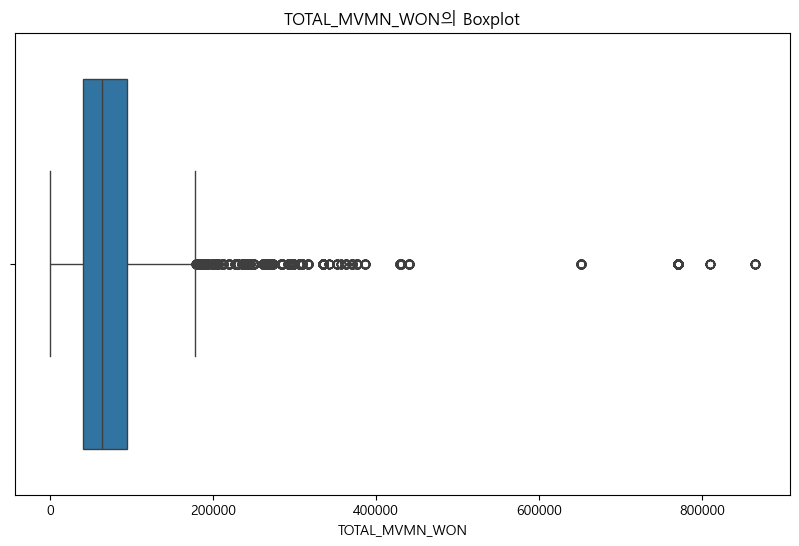

In [107]:
# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=travel_log, x='TOTAL_MVMN_WON')
plt.title('TOTAL_MVMN_WON의 Boxplot')
plt.xlabel('TOTAL_MVMN_WON')
plt.show()

> BOXPLOT의 이상치 기준인 1.5IQR을 넘어서는 수치는 많지만, 해당 수치들은 대부분 모여 있으며 분석에 필요한 데이터들이므로, 400000 이상의 데이터만 제거하기로 결정함

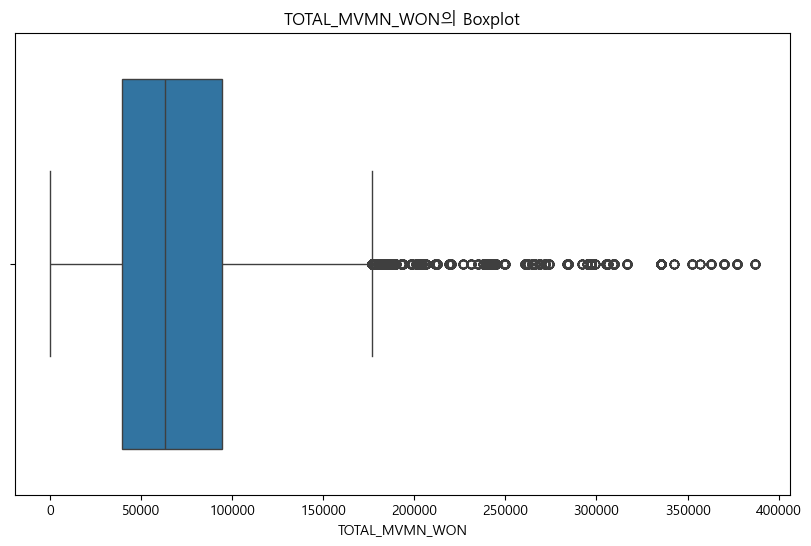

In [108]:
# 'TOTAL_MVMN_WON' 400000 이상의 값 제거
travel_log = travel_log[travel_log['TOTAL_MVMN_WON'] < 400000]

# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=travel_log, x='TOTAL_MVMN_WON')
plt.title('TOTAL_MVMN_WON의 Boxplot')
plt.xlabel('TOTAL_MVMN_WON')
plt.show()


<2> TOTAL_ACTIVITY_WON

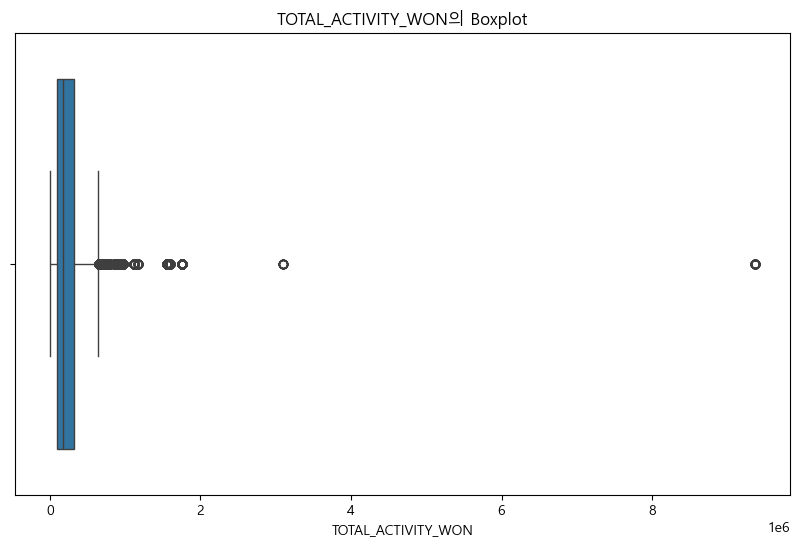

In [109]:
# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=travel_log, x='TOTAL_ACTIVITY_WON')
plt.title('TOTAL_ACTIVITY_WON의 Boxplot')
plt.xlabel('TOTAL_ACTIVITY_WON')
plt.show()

> BOXPLOT의 이상치 기준인 1.5IQR을 넘어서는 수치는 많지만, 해당 수치들은 대부분 모여 있으며 분석에 필요한 데이터들이므로, 현재 x축 단위인 1e6 기준으로 1.0 이상의 데이터만 제거하기로 결정함

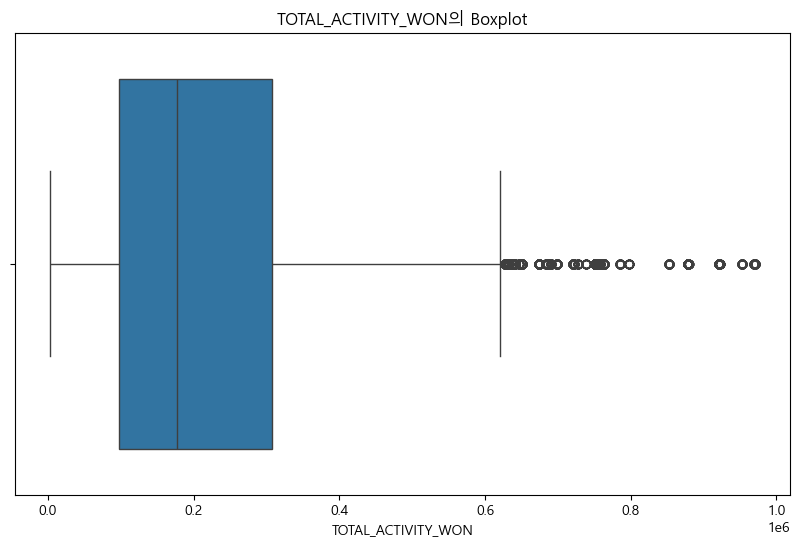

In [110]:
# 1 이상인 값을 제거
travel_log = travel_log[travel_log['TOTAL_ACTIVITY_WON'] < 1000000]

# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=travel_log, x='TOTAL_ACTIVITY_WON')
plt.title('TOTAL_ACTIVITY_WON의 Boxplot')
plt.xlabel('TOTAL_ACTIVITY_WON')
plt.show()


2. 결측치 처리 - 동반자정보 관련 변수인 REL_CD, COMPANION_GENDER, COMPANION_AGE_GRP 발생 이유 분석 위해 '나홀로 여행'인지 검증

In [111]:
# REL_CD가 결측치이고, TRAVEL_STATUS_ACCOMPANY가 '나홀로 여행'인 데이터 필터링
missing_rel_cd_and_solotravel = travel_log[(travel_log['REL_CD'].isnull()) & (travel_log['TRAVEL_STATUS_ACCOMPANY'] == '나홀로 여행')]

# 해당 데이터의 개수
count = missing_rel_cd_and_solotravel.shape[0]

print(f"REL_CD가 결측치이고, TRAVEL_STATUS_ACCOMPANY가 '나홀로 여행'인 데이터의 개수: {count}")

REL_CD가 결측치이고, TRAVEL_STATUS_ACCOMPANY가 '나홀로 여행'인 데이터의 개수: 6205


In [112]:
# REL_CD가 결측치이고, TRAVEL_STATUS_ACCOMPANY가 '나홀로 여행'이 아닌 데이터 필터링
filtered_data = travel_log[travel_log['REL_CD'].isnull() & (travel_log['TRAVEL_STATUS_ACCOMPANY'] != '나홀로 여행')]

# 결과 출력
print(filtered_data)

      GENDER  AGE_GRP  JOB_NM  TRAVEL_TERM  TRAVEL_LIKE_SGG_1  TRAVEL_LIKE_SGG_2  TRAVEL_LIKE_SGG_3  TRAVEL_STYL_1  TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  TRAVEL_STYL_7  TRAVEL_STYL_8 TRAVEL_STATUS_RESIDENCE TRAVEL_STATUS_DESTINATION TRAVEL_STATUS_ACCOMPANY  TRAVEL_MOTIVE  TRAVEL_COMPANIONS_NUM  TRAVEL_ID  REL_CD  COMPANION_GENDER  COMPANION_AGE_GRP TRAVEL_PURPOSE TRAVEL_START_YMD TRAVEL_END_YMD TRAVEL_MISSION_CHECK  TOTAL_MVMN_WON  ACTIVITY_TYPE_CD  TOTAL_ACTIVITY_WON
19125      여       30       2            3              26200              46130              42150              4              4              6              6              4              3              6              1                    전라북도                        전남                자녀 동반 여행              1                      2  g_g009362     NaN               NaN                NaN      22;27;3;4       2023-08-27     2023-08-28               3;6;21       30,000.00                 1 

In [113]:
# '나홀로 여행'인 경우 동반자 정보 결측치를 처리
travel_log.loc[
    (travel_log['REL_CD'].isnull()) & (travel_log['TRAVEL_STATUS_ACCOMPANY'] == '나홀로 여행'), 
    ['REL_CD', 'COMPANION_GENDER', 'COMPANION_AGE_GRP']
] = ['없음', '없음', '없음']

# '나홀로 여행'이 아닌 경우 해당 행 삭제
travel_log = travel_log.drop(
    travel_log[(travel_log['REL_CD'].isnull()) & (travel_log['TRAVEL_STATUS_ACCOMPANY'] != '나홀로 여행')].index
)

# 결과 확인
null_status = travel_log[['REL_CD', 'COMPANION_GENDER', 'COMPANION_AGE_GRP']].isnull().sum()
print(null_status)

REL_CD               0
COMPANION_GENDER     0
COMPANION_AGE_GRP    0
dtype: int64


C:\Users\kimbomi\AppData\Local\Temp\ipykernel_12848\1883630689.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '없음' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  travel_log.loc[


3. 결측치 처리 - MAJOR_TRANSPORT의 결측치는 없음으로, TOTAL_MVMN_WON의 결측치는 현재 TOTAL_MVMN_WON의 평균값으로 대체

In [114]:
# # MAJOR_TRANSPORT 결측치 처리
# travel_log['MAJOR_TRANSPORT'].fillna('없음', inplace=True)

# TOTAL_MVMN_WON 결측치 처리
mean_total_mvmn_won = travel_log['TOTAL_MVMN_WON'].mean()
travel_log['TOTAL_MVMN_WON'].fillna(mean_total_mvmn_won, inplace=True)

# 결측치 처리 후 데이터 상태 확인
null_status = travel_log[[ 'TOTAL_MVMN_WON']].isnull().sum()
print(null_status)

TOTAL_MVMN_WON    0
dtype: int64


4. 결측치 처리 - TOTAL_ACTIVITY_WON의 결측치를 현재 TOTAL_ACTIVITY_WON의 평균값으로 대체

In [115]:
# TOTAL_ACTIVITY_WON 결측치의 평균값 계산
mean_total_activity_won = travel_log['TOTAL_ACTIVITY_WON'].mean()

# 결측치를 평균값으로 대체
travel_log['TOTAL_ACTIVITY_WON'].fillna(mean_total_activity_won, inplace=True)

# 결측치 처리 후 데이터 상태 확인
null_status_activity = travel_log['TOTAL_ACTIVITY_WON'].isnull().sum()
print(null_status_activity)

0


5. 이후 추가 분석시 사용하기 위해 이동수단총소비액과 활동총소비액을 합친 총소비액 파생변수 추가

In [116]:
# TOTAL_WON 파생변수 추가
travel_log['TOTAL_WON'] = travel_log['TOTAL_MVMN_WON'] + travel_log['TOTAL_ACTIVITY_WON']

# 결과 확인
print(travel_log[['TOTAL_MVMN_WON', 'TOTAL_ACTIVITY_WON', 'TOTAL_WON']].head())

   TOTAL_MVMN_WON  TOTAL_ACTIVITY_WON  TOTAL_WON
0       10,000.00           71,700.00  81,700.00
1       10,000.00           71,700.00  81,700.00
2       10,000.00           71,700.00  81,700.00
3       10,000.00           71,700.00  81,700.00
4       10,000.00           71,700.00  81,700.00


6. 이후 추가 분석시 사용하기 위해 여행 기간 파생변수 추가

In [117]:
# 날짜 변환
travel_log['TRAVEL_START_YMD'] = pd.to_datetime(travel_log['TRAVEL_START_YMD'])
travel_log['TRAVEL_END_YMD'] = pd.to_datetime(travel_log['TRAVEL_END_YMD'])

# 여행 기간 계산
travel_log['TRAVEL_DURATION'] = (travel_log['TRAVEL_END_YMD'] - travel_log['TRAVEL_START_YMD']).dt.days

# 결과 확인
print(travel_log[['TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'TRAVEL_DURATION']].head(50))

   TRAVEL_START_YMD TRAVEL_END_YMD  TRAVEL_DURATION
0        2023-06-14     2023-06-16                2
1        2023-06-14     2023-06-16                2
2        2023-06-14     2023-06-16                2
3        2023-06-14     2023-06-16                2
4        2023-06-14     2023-06-16                2
5        2023-06-14     2023-06-16                2
6        2023-06-14     2023-06-16                2
7        2023-07-28     2023-07-30                2
8        2023-07-28     2023-07-30                2
9        2023-07-28     2023-07-30                2
10       2023-07-28     2023-07-30                2
11       2023-07-28     2023-07-30                2
12       2023-07-28     2023-07-30                2
13       2023-07-28     2023-07-30                2
14       2023-07-28     2023-07-30                2
15       2023-07-28     2023-07-30                2
16       2023-07-28     2023-07-30                2
17       2023-07-28     2023-07-30                2
18       202

7. 이후 추가 분석시 사용하기 위해 여행 계절 파생변수 추가

In [118]:
# 계절별 분류 함수 정의
def categorize_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# 'TRAVEL_START_YMD'에서 월을 추출하여 계절 분류
travel_log['SEASON'] = travel_log['TRAVEL_START_YMD'].dt.month.apply(categorize_season)

# 결과 확인
print(travel_log[['TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'TRAVEL_DURATION', 'SEASON']].head(50))

   TRAVEL_START_YMD TRAVEL_END_YMD  TRAVEL_DURATION  SEASON
0        2023-06-14     2023-06-16                2  Summer
1        2023-06-14     2023-06-16                2  Summer
2        2023-06-14     2023-06-16                2  Summer
3        2023-06-14     2023-06-16                2  Summer
4        2023-06-14     2023-06-16                2  Summer
5        2023-06-14     2023-06-16                2  Summer
6        2023-06-14     2023-06-16                2  Summer
7        2023-07-28     2023-07-30                2  Summer
8        2023-07-28     2023-07-30                2  Summer
9        2023-07-28     2023-07-30                2  Summer
10       2023-07-28     2023-07-30                2  Summer
11       2023-07-28     2023-07-30                2  Summer
12       2023-07-28     2023-07-30                2  Summer
13       2023-07-28     2023-07-30                2  Summer
14       2023-07-28     2023-07-30                2  Summer
15       2023-07-28     2023-07-30      

<h3>3. 전처리 후 확인</h3>

In [119]:
# 데이터의 행, 열 개수 출력
print('merge 데이터의 행, 열 개수 : ')
print(travel_log.shape)

merge 데이터의 행, 열 개수 : 
(48375, 34)


In [120]:
# 데이터의 구조와 타입 확인
print('merge 데이터의 구조와 타입 : ')
print(travel_log.info())

merge 데이터의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
Index: 48375 entries, 0 to 52012
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   GENDER                     48375 non-null  object        
 1   AGE_GRP                    48375 non-null  int64         
 2   JOB_NM                     48375 non-null  int64         
 3   TRAVEL_TERM                48375 non-null  int64         
 4   TRAVEL_LIKE_SGG_1          48375 non-null  int64         
 5   TRAVEL_LIKE_SGG_2          48375 non-null  int64         
 6   TRAVEL_LIKE_SGG_3          48375 non-null  int64         
 7   TRAVEL_STYL_1              48375 non-null  int64         
 8   TRAVEL_STYL_2              48375 non-null  int64         
 9   TRAVEL_STYL_3              48375 non-null  int64         
 10  TRAVEL_STYL_4              48375 non-null  int64         
 11  TRAVEL_STYL_5              48375 non-null  int64   

In [121]:
# 데이터의 결측치 확인
print('merge 데이터.csv의 결측치 : ')
print(travel_log.isnull().sum())

merge 데이터.csv의 결측치 : 
GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
TRAVEL_ID                    0
REL_CD                       0
COMPANION_GENDER             0
COMPANION_AGE_GRP            0
TRAVEL_PURPOSE               0
TRAVEL_START_YMD             0
TRAVEL_END_YMD               0
TRAVEL_MISSION_CHECK         0
TOTAL_MVMN_WON               0
ACTIVITY_TYPE_CD             0
TOTAL_ACTIVITY_WON           0
TOTAL_WON        

In [122]:
print(travel_log)

      GENDER  AGE_GRP  JOB_NM  TRAVEL_TERM  TRAVEL_LIKE_SGG_1  TRAVEL_LIKE_SGG_2  TRAVEL_LIKE_SGG_3  TRAVEL_STYL_1  TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  TRAVEL_STYL_7  TRAVEL_STYL_8 TRAVEL_STATUS_RESIDENCE TRAVEL_STATUS_DESTINATION TRAVEL_STATUS_ACCOMPANY  TRAVEL_MOTIVE  TRAVEL_COMPANIONS_NUM  TRAVEL_ID REL_CD COMPANION_GENDER COMPANION_AGE_GRP TRAVEL_PURPOSE TRAVEL_START_YMD TRAVEL_END_YMD TRAVEL_MISSION_CHECK  TOTAL_MVMN_WON  ACTIVITY_TYPE_CD  TOTAL_ACTIVITY_WON  TOTAL_WON  TRAVEL_DURATION  SEASON
0          여       20      12            3              50130              50110              26500              1              1              1              3              3              2              6              6                   광주광역시                        전남             2인 여행(가족 외)              1                      1  g_g002178   8.00             1.00              3.00         1;22;4       2023-06-14     2023-06-16               4;1;22     

In [123]:
travel_log.to_csv('data/training/merged_data/no_map_merge.csv',index=False)